In [1]:


from skimage import feature
import numpy as np
from tqdm import tqdm
class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius

    def describe(self, image, eps=1e-7):

        lbp = feature.local_binary_pattern(image, self.numPoints,
            self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
            bins=np.arange(0, self.numPoints + 3),
            range=(0, self.numPoints + 2))
 
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
 
        return hist

In [2]:
from sklearn.svm import LinearSVC
from imutils import paths
import argparse
import cv2
import matplotlib.pyplot as plt

In [3]:
desc = LocalBinaryPatterns(24, 8)
data = []
labels = []

In [21]:
[print(imagePaths) for imagePaths in paths.list_images("C:\\Users\\SONAL BANSAL\\Desktop\\WORK\\RESEARCH ALZHEIMER'S\\segmented\\")]


C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\AD\AD0.jpg
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\AD\AD1.jpg
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\AD\AD2.jpg
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\AD\AD3.jpg
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\AD\AD4.jpg
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\CN\CN0.jpg
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\CN\CN1.jpg
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\CN\CN2.jpg
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\CN\CN3.jpg
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\CN\CN4.jpg
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\MCI\MCI0.jpg
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\MCI\MCI1.jpg
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ AL

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\AD\AD0.jpg
C:\Users\SONAL BANSAL\Desktop\WORK\RESEARCH ALZHEIMER'S\segmented\AD\AD0.jpg


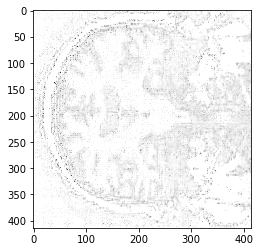

['AD']
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\AD\AD1.jpg
C:\Users\SONAL BANSAL\Desktop\WORK\RESEARCH ALZHEIMER'S\segmented\AD\AD1.jpg


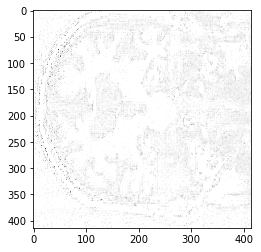

['AD', 'AD']
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\AD\AD2.jpg
C:\Users\SONAL BANSAL\Desktop\WORK\RESEARCH ALZHEIMER'S\segmented\AD\AD2.jpg


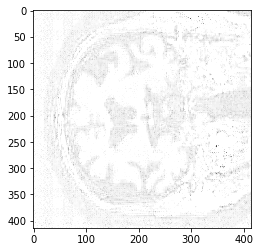

['AD', 'AD', 'AD']
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\AD\AD3.jpg
C:\Users\SONAL BANSAL\Desktop\WORK\RESEARCH ALZHEIMER'S\segmented\AD\AD3.jpg


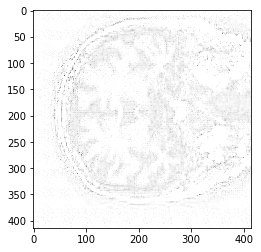

['AD', 'AD', 'AD', 'AD']
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\AD\AD4.jpg
C:\Users\SONAL BANSAL\Desktop\WORK\RESEARCH ALZHEIMER'S\segmented\AD\AD4.jpg


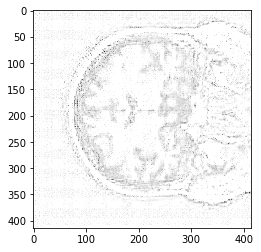

['AD', 'AD', 'AD', 'AD', 'AD']
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\CN\CN0.jpg
C:\Users\SONAL BANSAL\Desktop\WORK\RESEARCH ALZHEIMER'S\segmented\CN\CN0.jpg


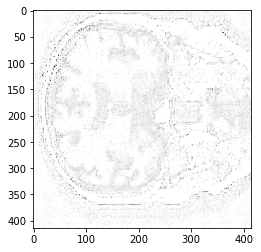

['AD', 'AD', 'AD', 'AD', 'AD', 'CN']
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\CN\CN1.jpg
C:\Users\SONAL BANSAL\Desktop\WORK\RESEARCH ALZHEIMER'S\segmented\CN\CN1.jpg


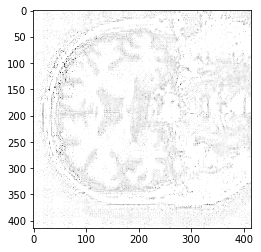

['AD', 'AD', 'AD', 'AD', 'AD', 'CN', 'CN']
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\CN\CN2.jpg
C:\Users\SONAL BANSAL\Desktop\WORK\RESEARCH ALZHEIMER'S\segmented\CN\CN2.jpg


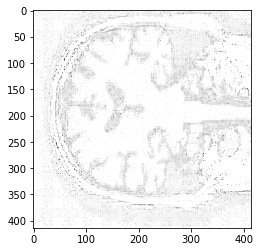

['AD', 'AD', 'AD', 'AD', 'AD', 'CN', 'CN', 'CN']
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\CN\CN3.jpg
C:\Users\SONAL BANSAL\Desktop\WORK\RESEARCH ALZHEIMER'S\segmented\CN\CN3.jpg


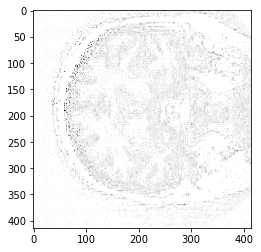

['AD', 'AD', 'AD', 'AD', 'AD', 'CN', 'CN', 'CN', 'CN']
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\CN\CN4.jpg
C:\Users\SONAL BANSAL\Desktop\WORK\RESEARCH ALZHEIMER'S\segmented\CN\CN4.jpg


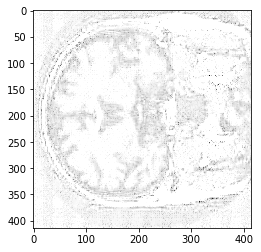

['AD', 'AD', 'AD', 'AD', 'AD', 'CN', 'CN', 'CN', 'CN', 'CN']
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\MCI\MCI0.jpg
C:\Users\SONAL BANSAL\Desktop\WORK\RESEARCH ALZHEIMER'S\segmented\MCI\MCI0.jpg


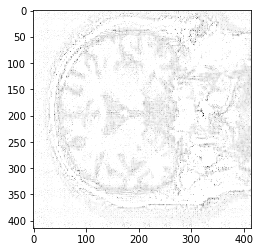

['AD', 'AD', 'AD', 'AD', 'AD', 'CN', 'CN', 'CN', 'CN', 'CN', 'MCI']
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\MCI\MCI1.jpg
C:\Users\SONAL BANSAL\Desktop\WORK\RESEARCH ALZHEIMER'S\segmented\MCI\MCI1.jpg


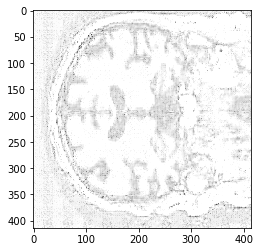

['AD', 'AD', 'AD', 'AD', 'AD', 'CN', 'CN', 'CN', 'CN', 'CN', 'MCI', 'MCI']
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\MCI\MCI2.jpg
C:\Users\SONAL BANSAL\Desktop\WORK\RESEARCH ALZHEIMER'S\segmented\MCI\MCI2.jpg


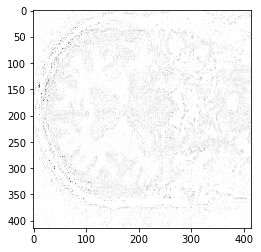

['AD', 'AD', 'AD', 'AD', 'AD', 'CN', 'CN', 'CN', 'CN', 'CN', 'MCI', 'MCI', 'MCI']
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\MCI\MCI3.jpg
C:\Users\SONAL BANSAL\Desktop\WORK\RESEARCH ALZHEIMER'S\segmented\MCI\MCI3.jpg


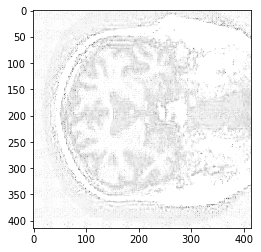

['AD', 'AD', 'AD', 'AD', 'AD', 'CN', 'CN', 'CN', 'CN', 'CN', 'MCI', 'MCI', 'MCI', 'MCI']
C:\Users\SONAL\ BANSAL\Desktop\WORK\RESEARCH\ ALZHEIMER'S\segmented\MCI\MCI4.jpg
C:\Users\SONAL BANSAL\Desktop\WORK\RESEARCH ALZHEIMER'S\segmented\MCI\MCI4.jpg


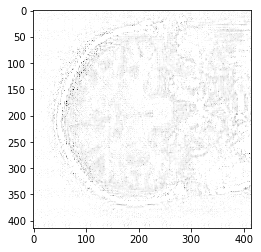

['AD', 'AD', 'AD', 'AD', 'AD', 'CN', 'CN', 'CN', 'CN', 'CN', 'MCI', 'MCI', 'MCI', 'MCI', 'MCI']


LinearSVC(C=100.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [5]:
import os
path="C:\\Users\\SONAL BANSAL\\Desktop\\WORK\\RESEARCH ALZHEIMER'S\\segmented\\"

os.chdir(path)
labels=[]
data=[]
for imagePath in paths.list_images(os.getcwd()):
    print(imagePath)
    imagePath=imagePath.split("\\")[-2:]
    path=os.path.join(os.path.join(os.getcwd(),imagePath[0])+"\\",imagePath[1])
    image = cv2.imread(path)
    print(path)
    plt.imshow(plt.imread(path))
    plt.show()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    labels.append(imagePath[-2])
    print(labels)
    data.append(hist)
 
# train a Linear SVM on the data
model = LinearSVC(C=100.0, random_state=42)
model.fit(data, labels)

In [ ]:
for imagePath in tqdm(paths.list_images(os.getcwd())):
    imagePath=imagePath.split("\\")[-2:]
    path=os.path.join(os.path.join(os.getcwd(),imagePath[0])+"\\",imagePath[1])
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    prediction = model.predict(hist.reshape(1, -1))
    cv2.putText(image, prediction[0], (10, 30), cv2.FONT_HERSHEY_SIMPLEX,1.0, (0, 0, 255), 3)
    cv2.imshow("Image", image)
    cv2.

(512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

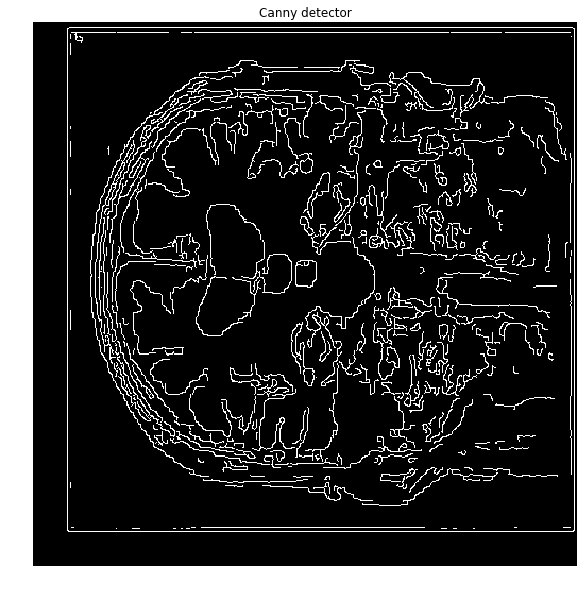

In [123]:
from skimage.feature import canny
im=plt.imread("C:\\Users\\SONAL BANSAL\\Desktop\\AD.jpg")
print(im.shape)
edges = canny(im[:,:,2])

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Canny detector')
ax.axis('off')

In [145]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3,1,1)
#         self.conv2 = nn.Conv2d(1,3,1)
#         self.conv3 = nn.Conv2d(20,3, 1)
#         # an affine operation: y = Wx + b
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.relu(self.conv1(x))
        
        # If the size is a square you can only specify a single number
#         x = F.relu(self.conv2(x))
#         x=F.relu(self.conv3(x))
#         x = x.view(-1, self.num_flat_features(x))
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 1, kernel_size=(1, 1), stride=(1, 1))
)


In [116]:
import torch
from torchvision import transforms, datasets

data_transform = transforms.Compose([
#         transforms.RandomSizedCrop(224),
#         transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
hymenoptera_dataset = datasets.ImageFolder(root=os.getcwd(),
                                           transform=data_transform)
dataset_loader = torch.utils.data.DataLoader(hymenoptera_dataset,
                                             batch_size=1, shuffle=False,
                                             num_workers=4)

In [34]:
len(dataset_loader)

15

torch.Size([1, 3, 414, 414])
{'AD': 0, 'CN': 1, 'MCI': 2}


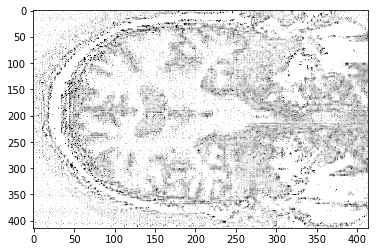

torch.Size([1, 3, 414, 414])
{'AD': 0, 'CN': 1, 'MCI': 2}


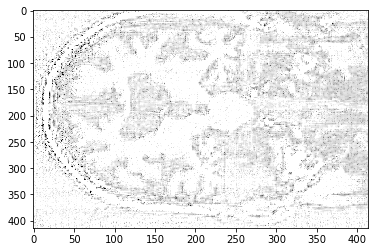

torch.Size([1, 3, 414, 414])
{'AD': 0, 'CN': 1, 'MCI': 2}


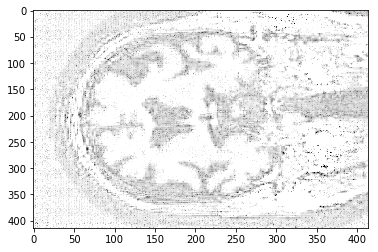

torch.Size([1, 3, 414, 414])
{'AD': 0, 'CN': 1, 'MCI': 2}


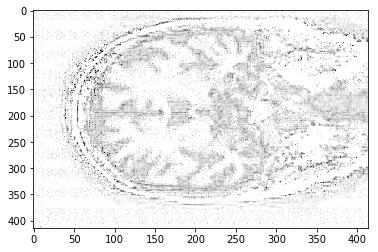

torch.Size([1, 3, 414, 414])
{'AD': 0, 'CN': 1, 'MCI': 2}


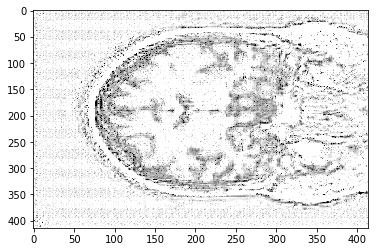

torch.Size([1, 3, 414, 414])
{'AD': 0, 'CN': 1, 'MCI': 2}


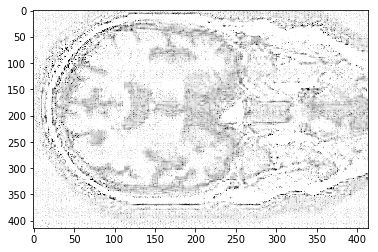

torch.Size([1, 3, 414, 414])
{'AD': 0, 'CN': 1, 'MCI': 2}


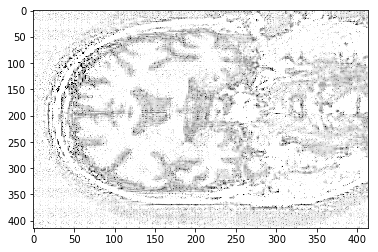

torch.Size([1, 3, 414, 414])
{'AD': 0, 'CN': 1, 'MCI': 2}


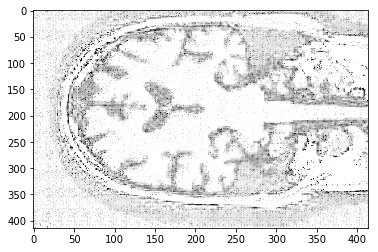

torch.Size([1, 3, 414, 414])
{'AD': 0, 'CN': 1, 'MCI': 2}


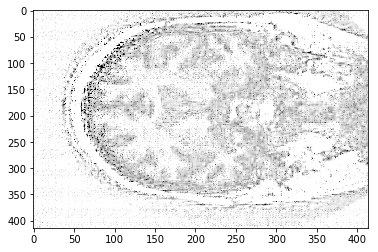

torch.Size([1, 3, 414, 414])
{'AD': 0, 'CN': 1, 'MCI': 2}


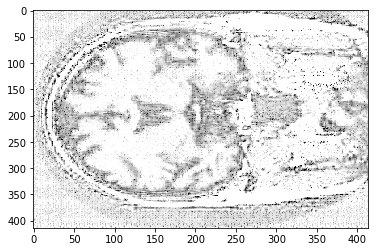

torch.Size([1, 3, 414, 414])
{'AD': 0, 'CN': 1, 'MCI': 2}


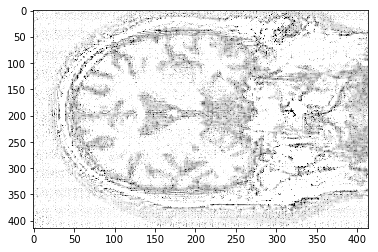

torch.Size([1, 3, 414, 414])
{'AD': 0, 'CN': 1, 'MCI': 2}


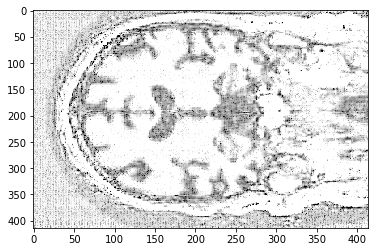

torch.Size([1, 3, 414, 414])
{'AD': 0, 'CN': 1, 'MCI': 2}


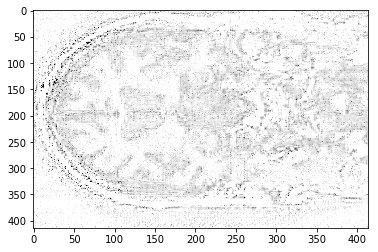

torch.Size([1, 3, 414, 414])
{'AD': 0, 'CN': 1, 'MCI': 2}


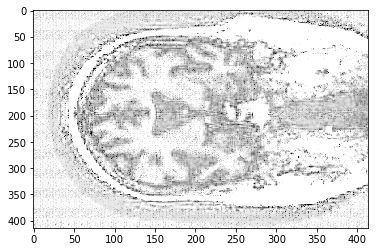

torch.Size([1, 3, 414, 414])
{'AD': 0, 'CN': 1, 'MCI': 2}


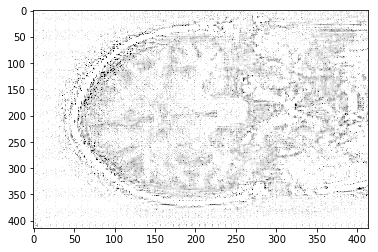

In [146]:
AD=0
MCI=0
CN=0
for i,(data,label) in enumerate(dataset_loader):
    print(data.shape)
    print(hymenoptera_dataset.class_to_idx)
    out=net(data)
    plt.imshow(out[0][0].detach().numpy(),cmap="gray",aspect='auto')
    plt.show()
#     if(label.item()==0):
#         plt.imsave("C:\\Users\\SONAL BANSAL\\Desktop\\WORK\\RESEARCH ALZHEIMER'S\\Improved\\AD\\"+str(AD)+".jpg",out[0][0].detach().numpy(),cmap="gray")
#         print("saved AD")
#         AD+=1
#     if(label.item()==1):
#         plt.imsave("C:\\Users\\SONAL BANSAL\\Desktop\\WORK\\RESEARCH ALZHEIMER'S\\Improved\\CN\\"+str(CN)+".jpg",out[0][0].detach().numpy(),cmap="gray")
#         print("saved CN")
#         CN+=1
#     if(label.item()==2):
#         plt.imsave("C:\\Users\\SONAL BANSAL\\Desktop\\WORK\\RESEARCH ALZHEIMER'S\\Improved\\MCI\\"+str(MCI)+".jpg",out[0][0].detach().numpy(),cmap="gray")
#         print("saved MCI")
#         MCI+=1
        

    